In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
file_path = 'Cópia de Base de dados - Teste.xlsx'
data = pd.read_excel(file_path)

In [4]:
data.head()

,Data,Grupos de usuários,Parceiro,compradores,comissão,cashback,vendas totais
0,2011-01-01,Grupo 1,Parceiro A,196.0,10272.872984,3266.588472,93389.7544
1,2011-01-02,Grupo 1,Parceiro A,115.0,7555.010188,2060.457324,68681.9108
2,2011-01-03,Grupo 1,Parceiro A,82.0,4839.237062,1358.103066,43993.0642
3,2011-01-04,Grupo 1,Parceiro A,172.0,10419.398572,2907.173396,94721.8052
4,2011-01-05,Grupo 1,Parceiro A,187.0,11304.530974,3137.586282,102768.4634


In [5]:
group_analysis = data.groupby('Grupos de usuários').agg({
    'compradores': 'sum',
    'comissão': 'sum',
    'cashback': 'sum',
    'vendas totais': 'sum'
}).reset_index()

In [6]:
# Calcular o cashback médio por comprador e a comissão média por comprador
group_analysis['Cashback Médio por Comprador'] = group_analysis['cashback'] / group_analysis['compradores']
group_analysis['Comissão Média por Comprador'] = group_analysis['comissão'] / group_analysis['compradores']

In [7]:
# Calcular a proporção de cashback em relação às vendas totais e o ROI
group_analysis['Percentual de Cashback'] = group_analysis['cashback'] / group_analysis['vendas totais'] * 100
group_analysis['ROI'] = (group_analysis['comissão'] - group_analysis['cashback']) / group_analysis['cashback'] * 100

In [8]:
print(group_analysis)

  Grupos de usuários  compradores       comissão       cashback  \
0            Grupo 1       9633.0  638140.786843  233424.960673   
1            Grupo 2      10814.0  728177.298034  370661.173458   
2            Grupo 3      11410.0  767888.096802  503597.080255   

   vendas totais  Cashback Médio por Comprador  Comissão Média por Comprador  \
0   5.605172e+06                     24.231803                     66.245280   
1   6.423095e+06                     34.276047                     67.336536   
2   6.785855e+06                     44.136466                     67.299570   

   Percentual de Cashback         ROI  
0                4.164456  173.381555  
1                5.770757   96.453621  
2                7.421277   52.480649  


In [11]:
# Exportar os dados processados para um arquivo Excel, incluindo as fórmulas utilizadas
output_path = 'analise_meliuz.xlsx'

# Criar um ExcelWriter para incluir as fórmulas
with pd.ExcelWriter(output_path, engine='xlsxwriter') as writer:
    # Escrever a análise por grupo na primeira aba
    group_analysis.to_excel(writer, sheet_name='Análise por Grupo', index=False)
    
    # Obter o workbook e worksheet para manipular as células
    workbook = writer.book
    worksheet = writer.sheets['Análise por Grupo']

    # Formatar colunas com valores monetários
    format_currency = workbook.add_format({'num_format': '$#,##0.00'})
    worksheet.set_column('C:E', None, format_currency)
    
    # Formatar colunas de percentuais
    format_percent = workbook.add_format({'num_format': '0.00%'})
    worksheet.set_column('H:H', None, format_percent)
    
    # Salvar e fechar o arquivo
    writer.save()

c:\Users\Luiza\anaconda3\lib\site-packages\xlsxwriter\workbook.py:339: UserWarning: Calling close() on already closed file.
  warn("Calling close() on already closed file.")


In [ ]:
data.describe()

,compradores,comissão,cashback,vendas totais
count,276.000000,276.000000,276.000000,276.000000
mean,115.423913,7732.631093,4013.344980,68167.108710
std,61.624299,4586.311057,3220.054578,37450.375335
min,35.000000,2071.450150,564.940950,18831.365000
25%,71.000000,4578.086166,1798.553810,41618.965150
50%,95.500000,6403.885246,2822.928295,58217.138600
75%,141.250000,8998.433334,5211.486338,81803.939400
max,354.000000,25404.822806,18219.041607,230952.934600


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276 entries, 0 to 275
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Data                276 non-null    datetime64[ns]
 1   Grupos de usuários  276 non-null    object        
 2   Parceiro            276 non-null    object        
 3   compradores         276 non-null    float64       
 4   comissão            276 non-null    float64       
 5   cashback            276 non-null    float64       
 6   vendas totais       276 non-null    float64       
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 15.2+ KB


<AxesSubplot:xlabel='cashback'>

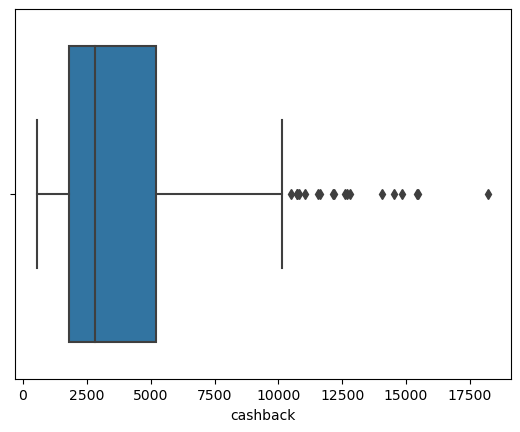

In [ ]:
# Checking for outliers
sns.boxplot(data=data, x='cashback')

<AxesSubplot:xlabel='comissão'>

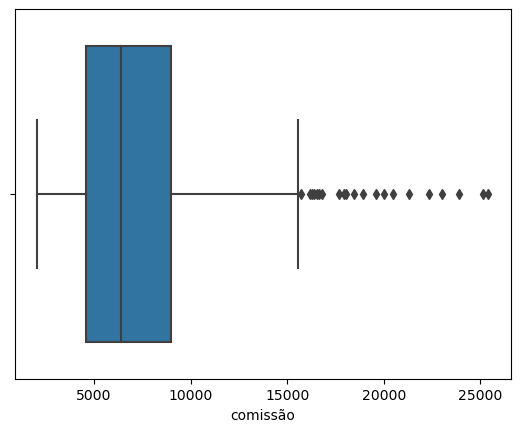

In [ ]:
# Checking for outliers
sns.boxplot(data=data, x='comissão')

<AxesSubplot:>

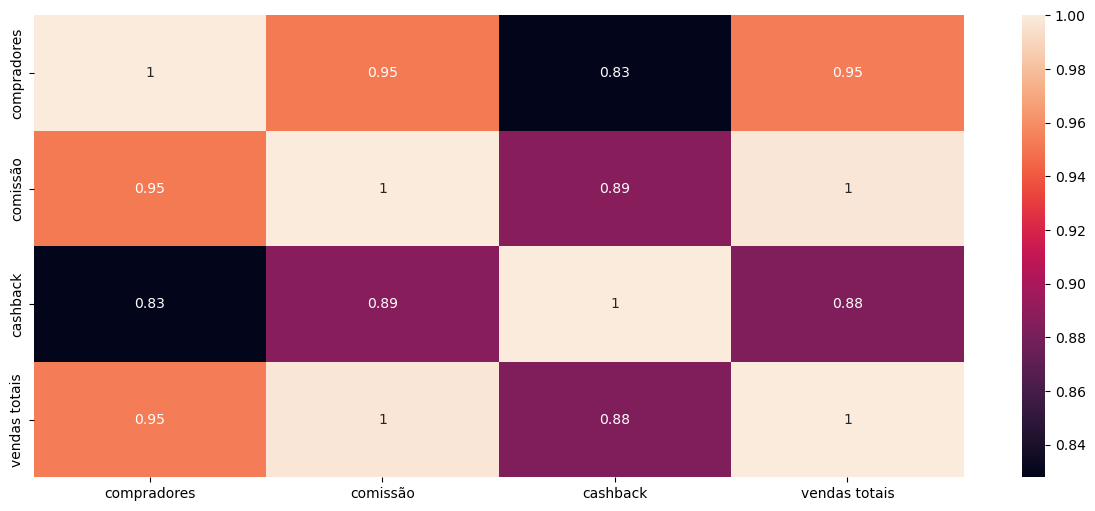

In [ ]:
# Heatmap of the correlation 
plt.figure(figsize=(15, 6))
sns.heatmap(data.corr('spearman'), annot=True)

<AxesSubplot:>

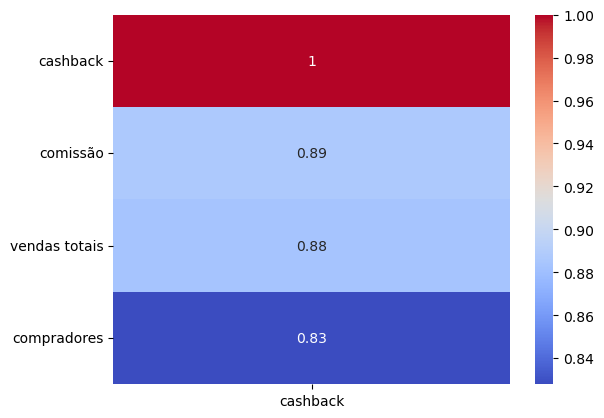

In [ ]:
sns.heatmap(data.corr('spearman')[['cashback']].sort_values(by='cashback', ascending=False), annot=True, cmap='coolwarm')


In [ ]:
df = pd.read_excel(file_path)

In [ ]:
# Adicionando a coluna de Comissão Líquida
df['Comissao_Liquida'] = df['comissão'] - df['cashback']

# Adicionando a coluna de ROI
df['ROI'] = ((df['comissão'] - df['cashback']) / df['cashback']) * 100

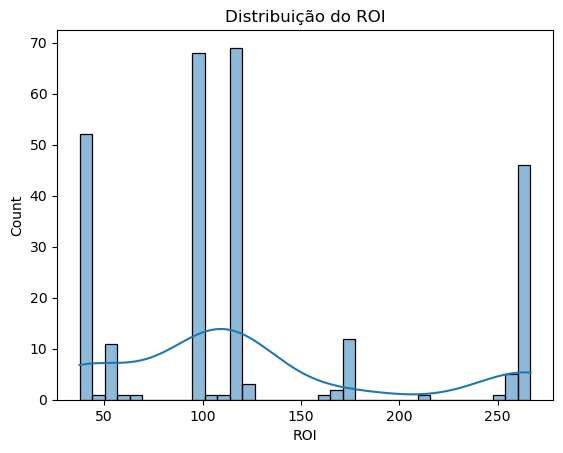

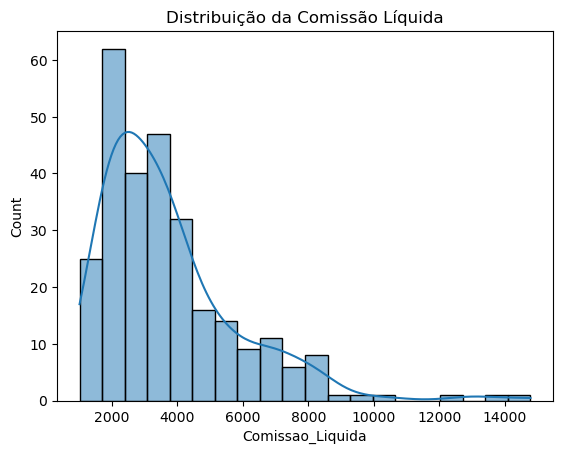

In [ ]:
# Distribuição de ROI
sns.histplot(df['ROI'], kde=True)
plt.title('Distribuição do ROI')
plt.show()

# Distribuição de Comissão Líquida
sns.histplot(df['Comissao_Liquida'], kde=True)
plt.title('Distribuição da Comissão Líquida')
plt.show()

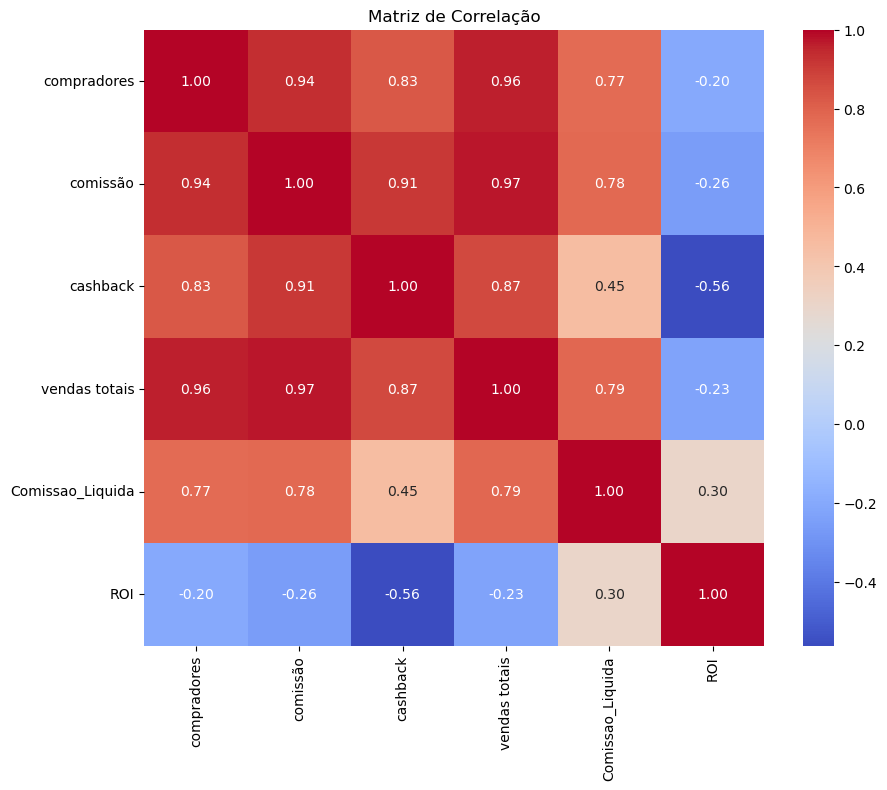

In [ ]:
# Matriz de correlação
corr_matrix = df.corr()

# Mapa de calor de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação')
plt.show()


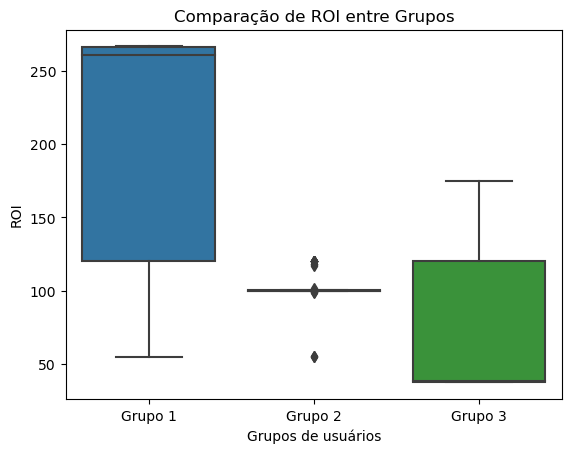

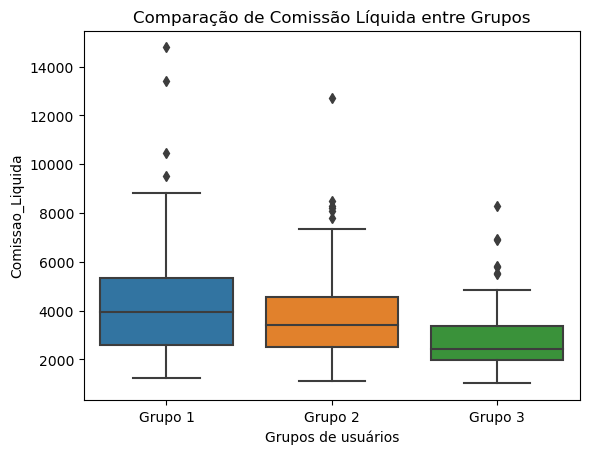

In [ ]:
# Comparação de ROI entre grupos
sns.boxplot(x='Grupos de usuários', y='ROI', data=df)
plt.title('Comparação de ROI entre Grupos')
plt.show()

# Comparação de Comissão Líquida entre grupos
sns.boxplot(x='Grupos de usuários', y='Comissao_Liquida', data=df)
plt.title('Comparação de Comissão Líquida entre Grupos')
plt.show()
